# ABOUT THE PROJECT
This project is the first task of Outreachy/MDF project. it is the perequisite project for outreachy intenship Summer '23.
In this project, I created an MDF model with 3 connected nodes, with a unique mathematical expression in each of the nodes and  one condition.I also generated the graph of the model and the current value for each of the node is evaluated and printed out.

### The Core Elements And Libraries of MDF Needed For This Project

The core element of MDF needed for this project are listed as follows:

**Models**: Model is the highest level construct in MDF that consists of one or more graphs and model attributes.The graph describe the operational features of the model i.e its structure and execution while the model attributes provide additional information(metadata) useful for executing, evaluating, testing or visualizing it.

**Graphs**: it specifies the structure and process flow of a model. The most fundamental element of a graph is a node which specifies some unit of computation in terms of its parameters and functions.

**Nodes**: it defines the core elements of computation in a graph that receive and transmit information via their input and output port. Nodes are connected to other nodes via directed edges, which, in the absence of additional conditions, define the computational flow of the model.

**Output ports**: it is the starting point of the data transmission process. After processing the information in a node, an output port is used to begin the transmission of information to the next node through edges.

**Edges**: it helps to transmit information from the output port of one node to the input port of another. Edges may also contain weights that can operate on the information they carry.

**Input Ports**: it is the endpoint of the data transmision process. it receives the information transmitted through an edge and inputs it to the next node for further processing.

**Condition**: This provide high-level set of descriptors for specifying conditional execution of nodes.They are used in specifying when nodes are allowed to be executed and it also allows models with relatively complex execution requirements to be expressed as graphs.

**Parameters**: These are attributes that determines the configuration and operation of nodes and edges. it suppoprts serialisation in portable format such as BSON and large format such as numpy arrays and TensorFlow tensors. Parameter can either be a fixed value(stateless) or change when the node is executed(stateful).

**Model metadata**: it provides additional information related to how the model element should  be handled by different applications. it can be added to the top level model to specify contact information, citations pointers to sample data and benchmark results and environments in which the specified model was originally implemented.


**Simple_connect**: This method is used to add an edge connecting the first output port of the pre node to the first input port of the post node.


**EvaluableGraph**: This is used to evaluate the current state of the graph's parameters.

**to_graph_image**: This method is used for converting MDF graphs into image of different format such as png and svg.

# WORKFLOW

* Define The Model
* Define the Graph
* Append the model to the graph
* Create First Node, define the parameter and output port of the node and append it to the graph model.
* Create Second Node, define the input port ,parameters and outputport of the node and then append the node to the graph model.
* Connect node A and B together using the simple_connect function
* Create third node, define the Input port, parameters and outputport of the node and then append the node to the graph model
* Connect node B and C together using the simple_connect function.
* Create condition for node A B and C and append the condition to the graph using the *ConditionSet* function.
* Generate the graph of the model 
* Evaluate the model graph to print out the current values of each node in the model.
* Save the model to json and yaml file format

### Importing Libraries

In [3]:
#importing the neccessary package for the project

from modeci_mdf.mdf import *

### Defining the model and the graph 

In [4]:
#defining the model
mod=Model(id= "TAO")


#defining graph
mod_graph=Graph(id="TAO_GRAPH")


#appending the graph to the model
mod.graphs.append(mod_graph)

### Creating the first  node (Node A)


In [5]:
#defining node a
a_node = Node(id="A", metadata={"color": "0 .8 0"})


#appending the stateless  parameter to the model
a_node.parameters.append(Parameter(id="increment", value=10.0))


#appending an outputport to the model
a_node.output_ports.append(OutputPort(id="output", value="increment"))



#appending the node to the graph
mod_graph.nodes.append(a_node)



#printing the structure of the graph
print(mod_graph.to_yaml())

TAO_GRAPH:
    nodes:
        A:
            metadata:
                color: 0 .8 0
            parameters:
                increment:
                    value: 10.0
            output_ports:
                output:
                    value: increment



### Creating the second Node (Node B)

In [6]:
#defining node B
b_node = Node(id="B", metadata={"color": ".8 0 0"})


#appending the node to the graph model
mod_graph.nodes.append(b_node)


#appending an inputport to the model
b_node.input_ports.append(InputPort(id="input"))



#creating a stateless parameter and appending it to the node
b_node.parameters.append(Parameter(id="u", value=1.2))
b_node.parameters.append(Parameter(id="v", value=3))


#creating a stateful parameter and appending it to the node
p1 = Parameter(
    id="simple_exp",
    value="input * u - v",
)

#appending the stateful parameter to the node
b_node.parameters.append(p1)


#creating an outputport and appending it to the node
b_node.output_ports.append(OutputPort(id="output", value="simple_exp"))


#appending the node to the graph
mod_graph.nodes.append(b_node)


#printing the structure of the graph
print(mod_graph.to_yaml())

TAO_GRAPH:
    nodes:
        A:
            metadata:
                color: 0 .8 0
            parameters:
                increment:
                    value: 10.0
            output_ports:
                output:
                    value: increment
        B:
            metadata:
                color: .8 0 0
            input_ports:
                input: {}
            parameters:
                u:
                    value: 1.2
                v:
                    value: 3
                simple_exp:
                    value: input * u - v
            output_ports:
                output:
                    value: simple_exp



# Creating connection between node A and node B

In [7]:
#connecting a_node and b_node together
e1 = simple_connect(a_node, b_node, mod_graph)

#printing out the structure of the model in yaml format
print(mod_graph.to_yaml())

TAO_GRAPH:
    nodes:
        A:
            metadata:
                color: 0 .8 0
            parameters:
                increment:
                    value: 10.0
            output_ports:
                output:
                    value: increment
        B:
            metadata:
                color: .8 0 0
            input_ports:
                input: {}
            parameters:
                u:
                    value: 1.2
                v:
                    value: 3
                simple_exp:
                    value: input * u - v
            output_ports:
                output:
                    value: simple_exp
    edges:
        edge_A_B:
            sender: A
            receiver: B
            sender_port: output
            receiver_port: input



### Creating the third node (Node C)

In [8]:
#creating node c
c_node  = Node(id="C", metadata={"color": "0 .8 0"})

#appending node c to the graph
mod_graph.nodes.append(c_node)

#creating an inputport for node c
c_node.input_ports.append(InputPort(id="input"))

#creating a stateless parameter and append it to node c
c_node.parameters.append(Parameter(id="y", value=8.2))

#create another stateless parameter and append it to node c
c_node.parameters.append(Parameter(id="u", value=15))

#creating a stateful parameter 
pc = Parameter(
    id="simple_eq",
    value="y**2 + 2*u",
)
#appending the stateful parameter to node c
c_node.parameters.append(pc)

#creating an appending an outputport to node c
c_node.output_ports.append(OutputPort(id="output", value="simple_eq"))

#appending the c node to the graph 
mod_graph.nodes.append(c_node)

#printing out the structure of the graph in yaml format
print(mod_graph.to_yaml())

TAO_GRAPH:
    nodes:
        A:
            metadata:
                color: 0 .8 0
            parameters:
                increment:
                    value: 10.0
            output_ports:
                output:
                    value: increment
        B:
            metadata:
                color: .8 0 0
            input_ports:
                input: {}
            parameters:
                u:
                    value: 1.2
                v:
                    value: 3
                simple_exp:
                    value: input * u - v
            output_ports:
                output:
                    value: simple_exp
        C:
            metadata:
                color: 0 .8 0
            input_ports:
                input: {}
            parameters:
                y:
                    value: 8.2
                u:
                    value: 15
                simple_eq:
                    value: y**2 + 2*u
            output_ports:
                output:


### Creating connection between node B and node C

In [9]:
#connecting node b and c together
e2 = simple_connect(b_node, c_node, mod_graph)

#printing the structure of the graph
print(mod_graph.to_yaml())

TAO_GRAPH:
    nodes:
        A:
            metadata:
                color: 0 .8 0
            parameters:
                increment:
                    value: 10.0
            output_ports:
                output:
                    value: increment
        B:
            metadata:
                color: .8 0 0
            input_ports:
                input: {}
            parameters:
                u:
                    value: 1.2
                v:
                    value: 3
                simple_exp:
                    value: input * u - v
            output_ports:
                output:
                    value: simple_exp
        C:
            metadata:
                color: 0 .8 0
            input_ports:
                input: {}
            parameters:
                y:
                    value: 8.2
                u:
                    value: 15
                simple_eq:
                    value: y**2 + 2*u
            output_ports:
                output:


### Setting Conditions for Node A, B and C

In [10]:
#creating condition for node A. This condition means that A is always executed
cond_a = Condition('Always')

#creating condition for node B. This condition means that B will only execute when A has already run 3 times.
cond_b = Condition(type="EveryNCalls", dependencies=a_node.id, n=3) 

#creating condition for node C. This condition means that C will only execute when B has run 4 times.
cond_c = Condition(type="EveryNCalls", dependencies=b_node.id, n=4)  



#add the conditions to the Graph
mod_graph.conditions = ConditionSet(
    node_specific={a_node.id: cond_a, b_node.id: cond_b, c_node.id: cond_c},
)


# Print the current structure
print(mod_graph.to_yaml())

TAO_GRAPH:
    nodes:
        A:
            metadata:
                color: 0 .8 0
            parameters:
                increment:
                    value: 10.0
            output_ports:
                output:
                    value: increment
        B:
            metadata:
                color: .8 0 0
            input_ports:
                input: {}
            parameters:
                u:
                    value: 1.2
                v:
                    value: 3
                simple_exp:
                    value: input * u - v
            output_ports:
                output:
                    value: simple_exp
        C:
            metadata:
                color: 0 .8 0
            input_ports:
                input: {}
            parameters:
                y:
                    value: 8.2
                u:
                    value: 15
                simple_eq:
                    value: y**2 + 2*u
            output_ports:
                output:


The cell above shows the different conditions for the nodes.

Condition of Node A: The Condition of Node A is "Always", this means that node A is not dependent on any Node and it will always run when it is being executed.



Condition of Node B: The condition of Node B is EveryNcalls and it has dependencies of a_id with n = 3, this means that the execution of Node B is dependent on Node A, and Node B  will only run when A has already run 3 times, Given us this order of execution AAAB

Condition of Node C: The condition of Node C is also EveryNcalls and it has dependencies of b_id with n = 4, this means that the execution of Node C is dependent on Node B, and it will only run when Node B has already run 4 times, Given us this order of  execution BBBBC


# Generating the graph of the model

Converting MDF graph: TAO_GRAPH to graphviz (level: 3, format: png)
    Node: A
Converting 0 .8 0 to hex color
    Node: B
Converting .8 0 0 to hex color
    Node: B
Converting .8 0 0 to hex color
    Node: C
Converting 0 .8 0 to hex color
    Node: C
Converting 0 .8 0 to hex color
    Edge: edge_A_B connects A to B
    Edge: edge_B_C connects B to C
Written graph image to: AB.png


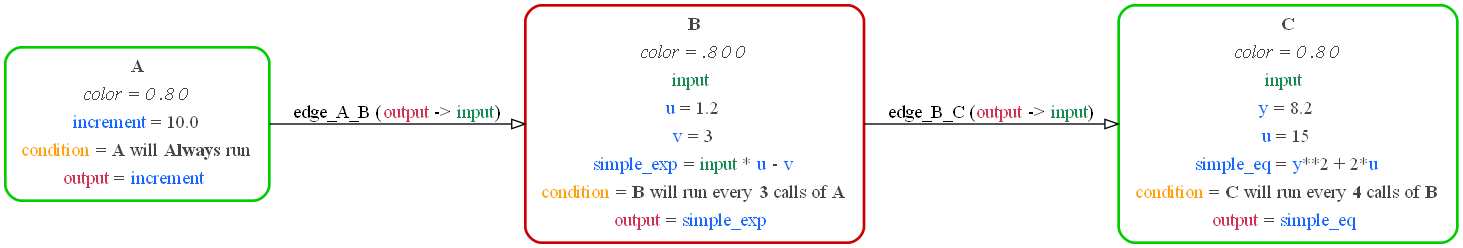

In [11]:
#generating the graph of the model

mod.to_graph_image(
        engine="dot",
        output_format="png",
        view_on_render=False,
        level=3,
        filename_root="AB",
        is_horizontal=True
    )
# visualising the model
from IPython.display import Image
Image(filename="AB.png")

# Evaluating the graph of the model

In [12]:
#Defining the graph of the model
eg = EvaluableGraph(mod_graph, verbose=False)

#evaluating the graph of the model
eg.evaluate()

#printing out the output of node A
print('Output of A: %s'%eg.enodes["A"].evaluable_outputs["output"].curr_value) 

#printing out the output of node B
print('Output of B: %s'%eg.enodes["B"].evaluable_outputs["output"].curr_value)

#printing out the output of node C
print('Output of C: %s'%eg.enodes["C"].evaluable_outputs["output"].curr_value) 


Init graph: TAO_GRAPH
Evaluating graph: TAO_GRAPH, root nodes: ['A', 'B', 'C'], with array format numpy
Output of A: 10
Output of B: 9
Output of C: 97.24


In the graph cell above, the current value of each of the node is evaluated and printed out. A node has an output of 10, B has 9 and C has an output of 97.24

# Saving the model to json and yaml file format

In [13]:
# saving the model in json file format
mod.to_json_file("model_json_file")

'model_json_file'

In [14]:
# saving the model in yaml file format
mod.to_yaml_file("model_yaml_file")

'model_yaml_file'